Team members: Sebastian Castano, Shashank Sheth, Trey Warren, and Chris Cherewka

---
# EXTRACT

For this project, we decided to aggregate data on music.  To be more specific, we imported data sets from Kaggle that contained:
1. Spotify top 2000 songs (more on this later)
2. Billboard top songs
3. Grammy award winners
4. Song attritbutes

All of these data sets came in as CSV files.  Reading these into pandas dataframes was relatively smooth.

Our billboard file contained a cell that had all the lyrics of a song contained in a single cell.  This would not be read in with UTF-8 enconding. We then moved to another common enconding type "latin-1" that read in the file with no issues.

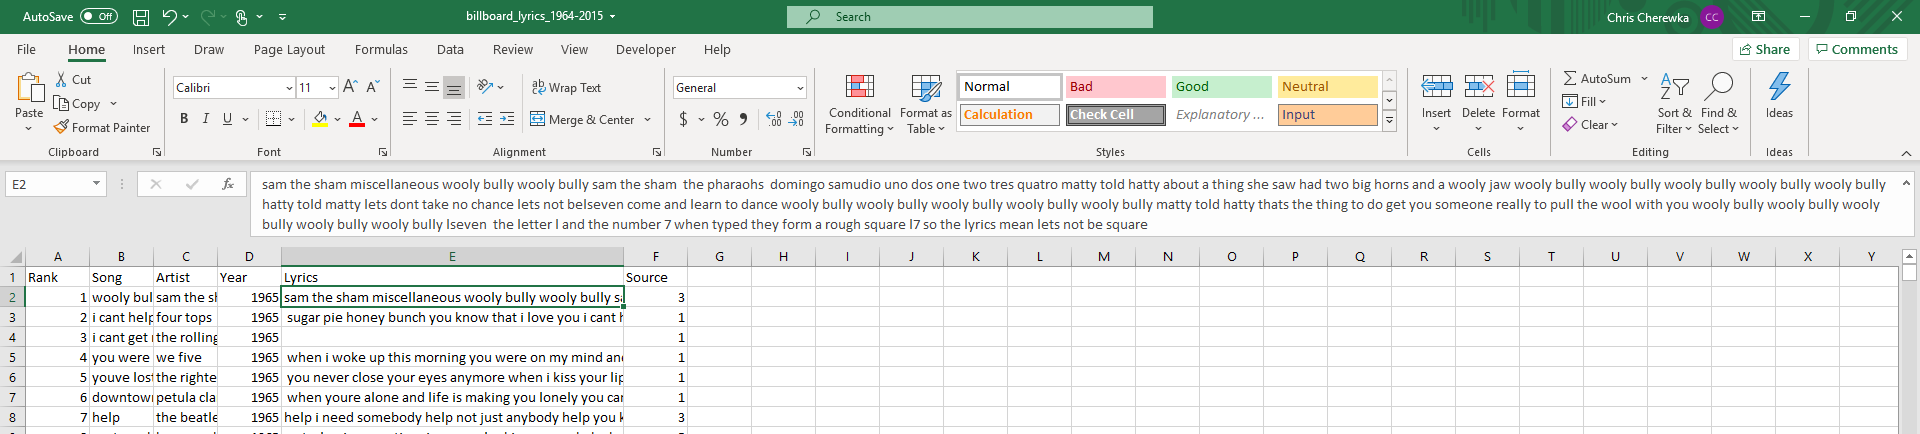

### Top 2000 on Spofity

In [1]:
import os
import csv
import pandas as pd
import pymongo

In [2]:
spotify_file = pd.read_csv('Resources/Spotify-2000.csv')
spotify_df = pd.DataFrame(spotify_file)
spotify_df = spotify_df.apply(lambda x: x.astype(str).str.lower())
spotify_df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,sunrise,norah jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,black night,deep purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,clint eastwood,gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,the pretender,foo fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,waitin' on a sunny day,bruce springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


### Billboard Top 100

In [3]:
# Read CSV
billboard_file = pd.read_csv('Resources/billboard_lyrics_1964-2015.csv', encoding='latin-1')
# Create DataFrame
billboard_df = pd.DataFrame(billboard_file)
# Peep
billboard_df.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


### Grammy Award Winners

In [4]:
grammy_file = pd.read_csv('Resources/the_grammy_awards.csv')
grammy_df = pd.DataFrame(grammy_file)
grammy_df = grammy_df.apply(lambda x: x.astype(str).str.lower())
grammy_df.head()

,year,category,nominee,workers,winner
0,1959,album of the year,the music from peter gunn.,henry mancini,true
1,1959,best album cover,only the lonely,frank sinatra (art director),true
2,1959,best arrangement,the music from peter gunn,henry mancini (artist/arranger),true
3,1959,best classical performance - chamber music (in...,beethoven: quartet 130,"the hollywood string quartet, paul shure (arti...",true
4,1959,best classical performance - instrumentalist (...,segovia golden jubilee,andrés segovia,true


### Song Attributes

In [5]:
att_file = pd.read_csv('Resources/data.csv')
att_df = pd.DataFrame(att_file)
att_df.song_title = att_df.song_title.apply(lambda x: x.lower())
att_df.artist = att_df.artist.apply(lambda x: x.lower())
att_df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,mask off,future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,redbone,childish gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,xanny family,future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,master of none,beach house
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,parallel lines,junior boys


---
# Transformation

In [6]:
# Seporate the main artist from any featuring artists
billboard_df[['Main Artist','Featuring Artists']] = billboard_df.Artist.str.split(" featuring ", n=1, expand=True)

# Fill the newly created Featuring Artist slots with NaN for tracks with no features
billboard_df.fillna(value=pd.np.nan, inplace=True)

# Select and order our desired rows
billboard_df = billboard_df[['Rank', 'Song', 'Main Artist', 'Featuring Artists', 'Year', 'Lyrics']]
billboard_df.head(5005).tail()

,Rank,Song,Main Artist,Featuring Artists,Year,Lyrics
5000,1,uptown funk,mark ronson,bruno mars,2015,this hit that ice cold michelle pfeiffer that...
5001,2,thinking out loud,ed sheeran,NaN,2015,when your legs dont work like they used to be...
5002,3,see you again,wiz khalifa,charlie puth,2015,its been a long day without you my friend and...
5003,4,trap queen,fetty wap,NaN,2015,im like hey wassup hello seen yo pretty ass s...
5004,5,sugar,maroon 5,NaN,2015,im hurting baby im broken down i need your lo...


#### We want to filter out any songs that appear in multiple years

In [7]:
# Start by grouping BOTH song and artist (as some common song titles appear a few times by various artists)
billboard_grouped = billboard_df.groupby(["Song", "Main Artist"]).count()

# Then we only care about the unique songs appearing more than once
duplicates_df = billboard_grouped.loc[billboard_grouped.Rank > 1]\
                .sort_values("Rank", ascending=False)

# It looks like twice is the most any one song allears on the charts
duplicates_df.head()

# That makes sense, given that some song released later into a year may appear in back-to-back years
# but no song has ever maintained top 100 popularity for 3 straight years

,,Rank,Featuring Artists,Year,Lyrics
Song,Main Artist,,,,
100 pure love,crystal waters,2,0,2,2
quit playing games with my heart,backstreet boys,2,0,2,2
one more night,maroon 5,2,0,2,2
only girl in the world,rihanna,2,0,2,2
only wanna be with you,hootie the blowfish,2,0,2,2


In [8]:
# Lets drop the leftover charting songs from the prior years
billboard_perSong_df = billboard_df.drop_duplicates(subset=['Song', 'Main Artist'])
billboard_perSong_df

,Rank,Song,Main Artist,Featuring Artists,Year,Lyrics
0,1,wooly bully,sam the sham and the pharaohs,NaN,1965,sam the sham miscellaneous wooly bully wooly b...
1,2,i cant help myself sugar pie honey bunch,four tops,NaN,1965,sugar pie honey bunch you know that i love yo...
2,3,i cant get no satisfaction,the rolling stones,NaN,1965,
3,4,you were on my mind,we five,NaN,1965,when i woke up this morning you were on my mi...
4,5,youve lost that lovin feelin,the righteous brothers,NaN,1965,you never close your eyes anymore when i kiss...
...,...,...,...,...,...,...
5095,96,el perdon,nicky jam and enrique iglesias,NaN,2015,enrique iglesias dime si es verdad me dijeron ...
5096,97,she knows,neyo,juicy j,2015,NaN
5097,98,night changes,one direction,NaN,2015,going out tonight changes into something red ...
5098,99,back to back,drake,NaN,2015,oh man oh man oh man not againyeah i learned ...


In [9]:
# Check to see that we only lost the amount of data that we wanted to
len(billboard_perSong_df.index) == len(billboard_df.index) - len(duplicates_df.index)

True

---
### Billboard Frequenters

In [10]:
# Who has the most Billboard hits?
billboard_perSong_df.groupby("Main Artist").count().sort_values("Rank", ascending=False).head(10)

,Rank,Song,Featuring Artists,Year,Lyrics
Main Artist,,,,,
madonna,35,35,1,35,35
mariah carey,27,27,4,27,26
elton john,26,26,0,26,25
rihanna,24,24,8,24,24
michael jackson,22,22,0,22,22
stevie wonder,22,22,0,22,20
janet jackson,21,21,1,21,21
whitney houston,20,20,2,20,20
usher,19,19,6,19,19


In [11]:
# Who has the most Billboard-charting features?
billboard_perSong_df.groupby("Featuring Artists").count().sort_values("Rank", ascending=False).head(10)

,Rank,Song,Main Artist,Year,Lyrics
Featuring Artists,,,,,
lil wayne,10,10,10,10,9
drake,9,9,9,9,9
tpain,9,9,9,9,9
akon,9,9,9,9,7
jayz,8,8,8,8,8
ludacris,8,8,8,8,8
r kelly,7,7,7,7,7
snoop dogg,6,6,6,6,6
rihanna,6,6,6,6,6


#### Now we'll create a dataframe of each artists' total Billboard appearances

In [12]:
# Start by grouping the counts for Main Artist and Featuring Artist
artist_count_df = billboard_perSong_df.groupby("Main Artist").count().reset_index()
feature_count_df = billboard_perSong_df.groupby("Featuring Artists").count().reset_index()

# Rename the columns we plan to merge on to be the same
artist_count_df.rename(columns={"Main Artist":"Artist", "Song":"Headline Appearances"}, inplace=True)
feature_count_df.rename(columns={"Featuring Artists":"Artist", "Song":"Feature Appearances"}, inplace=True)

# Merge on Artist and fill any NaNs
appearances_df = pd.merge(artist_count_df, feature_count_df, on='Artist', how='outer').fillna(0)

# Add a column for total appearances being the sum of Artist and Featured counts
appearances_df["Total"] = appearances_df["Headline Appearances"]+appearances_df["Feature Appearances"]

# Slim down the df to be only the columns we care about
appearances_df = appearances_df[["Artist", "Headline Appearances", "Feature Appearances", "Total"]]

# Sort by total appearances and reset the index to rank our superstars
billboard_appearances_df = appearances_df.sort_values("Total", ascending=False).reset_index(drop=True)

# Checkout the finished product
billboard_appearances_df.head(20)

,Artist,Headline Appearances,Feature Appearances,Total
0,madonna,35.0,0.0,35.0
1,rihanna,24.0,6.0,30.0
2,mariah carey,27.0,0.0,27.0
3,elton john,26.0,0.0,26.0
4,r kelly,16.0,7.0,23.0
5,michael jackson,22.0,0.0,22.0
6,stevie wonder,22.0,0.0,22.0
7,usher,19.0,2.0,21.0
8,janet jackson,21.0,0.0,21.0
9,drake,12.0,9.0,21.0


---
#### Some quick Attempts at Merging with Spotify

In [13]:
print(f"The Spotify list has {len(spotify_df)} songs.")

The Spotify list has 1994 songs.


In [14]:
# Merge the songs
pd.merge(spotify_df.apply(lambda x: x.astype(str).str.lower()), 
         billboard_perSong_df.rename(columns={"Song":"Title"}), 
         on="Title", how="inner")

,Index,Title,Artist,Top Genre,Year_x,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Rank,Main Artist,Featuring Artists,Year_y,Lyrics
0,7,she will be loved,maroon 5,pop,2002,102,71,71,-6,13,54,257,6,3,74,35,maroon 5,NaN,2004,beauty queen of only eighteen she had some tr...
1,10,without me,eminem,detroit hip hop,2002,112,67,91,-3,24,66,290,0,7,82,21,eminem,NaN,2002,obie trice real name no gimmickstwo trailer p...
2,17,speed of sound,coldplay,permanent wave,2005,123,90,52,-7,7,36,288,0,6,69,57,coldplay,NaN,2005,how long before i get in before it starts bef...
3,19,music,john miles,classic uk pop,2004,87,31,27,-13,63,12,352,1,3,46,17,madonna,NaN,2000,hey mister dj put a record on i want to dance...
4,19,music,john miles,classic uk pop,2004,87,31,27,-13,63,12,352,1,3,46,83,erick sermon,marvin gaye,2001,just like music theres no doubt no doubt no d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,1980,touch me,the doors,album rock,1969,109,90,43,-5,12,77,190,41,7,68,49,the doors,NaN,1969,yeah come on come on come on come on now touc...
480,1981,summertime,brainbox,dutch prog,1969,89,55,38,-9,31,25,263,4,3,36,38,dj jazzy jeff the fresh prince,NaN,1991,summer summer summertime time to sit back and ...
481,1989,summertime,louis armstrong,adult standards,1958,168,7,17,-21,14,10,298,92,3,66,38,dj jazzy jeff the fresh prince,NaN,1991,summer summer summertime time to sit back and ...
482,1983,get ready,rare earth,blues rock,1969,127,87,41,-6,83,65,"1,292",0,4,45,8,rare earth,NaN,1970,never met a girl could make me feel the way t...


We lost quite a few rows above, we may need to explore a regex strategy. Or hell, maybe of the "Top 2000 Songs" less than 500 appeared on the Billboard top 100 list, but that is doubtful unless the creater of the Spofity list was being completely bias. 

---

In [15]:
# Merge the artists Billboard appearance counts
pd.merge(spotify_df.apply(lambda x: x.astype(str).str.lower()), 
         billboard_appearances_df, on="Artist", how="inner")\
        .sort_values("Total", ascending=False)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Headline Appearances,Feature Appearances,Total
457,286,la isla bonita,madonna,dance pop,2009,100,83,71,-5,6,97,243,39,4,66,35.0,0.0,35.0
458,295,vogue,madonna,dance pop,2009,116,88,74,-6,42,33,317,0,4,66,35.0,0.0,35.0
459,302,like a prayer,madonna,dance pop,2009,111,84,62,-5,18,26,343,26,4,71,35.0,0.0,35.0
460,368,frozen,madonna,dance pop,2009,108,74,59,-8,18,29,379,51,3,55,35.0,0.0,35.0
461,1384,live to tell,madonna,dance pop,1986,110,31,67,-14,11,27,353,41,3,56,35.0,0.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,538,pompeii,bastille,metropopolis,2013,127,72,68,-6,27,57,214,8,4,70,1.0,0.0,1.0
548,534,let her go,passenger,folk-pop,2013,75,55,48,-7,10,24,253,37,7,76,1.0,0.0,1.0
547,519,little talks,of monsters and men,folk-pop,2012,103,76,45,-5,15,42,267,2,3,75,1.0,0.0,1.0
529,462,pumped up kicks,foster the people,indie pop,2011,128,71,73,-6,10,97,240,14,3,84,1.0,0.0,1.0


Ok, we lost less than half of the songs this time. Not as bad. 

But I'm still not convinced, I want to see what songs make up this spotify list that came out more recently...

In [16]:
spotify_df.sort_values("Year", ascending=False).head(10)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
780,781,a whiter shade of pale - original single version,procol harum,album rock,2019,150,66,25,-7,9,44,249,50,3,67
791,792,deutschland,rammstein,alternative metal,2019,120,90,52,-5,10,24,322,0,4,72
784,785,last christmas,wham!,dance rock,2019,108,58,74,-9,18,94,265,19,3,85
783,784,stay - remastered,jackson browne,album rock,2019,107,77,60,-8,11,72,204,10,3,36
786,787,bad guy,billie eilish,electropop,2019,135,43,70,-11,10,56,194,33,38,95
787,788,memories,maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,98
779,780,arcade,duncan laurence,dutch pop,2019,72,33,45,-13,14,27,184,82,4,73
788,789,love like blood,killing joke,alternative metal,2019,124,76,40,-8,37,49,261,10,5,37
789,790,reünie,snelle,dutch hip hop,2019,96,35,51,-9,59,51,172,67,15,71
782,783,the load-out - remastered,jackson browne,album rock,2019,106,32,52,-12,13,31,335,74,3,37


I'm seeing a lot more Dutch music than I'd prefer to see on an authentic Greatest Hits of All Time list... No offense to the Dutch, but come on. I know my hip hop and I've never heard of Reünie. Also, there seem to be many incorrect years, `Wham!` in 2019?

[Link to article](https://medium.com/@m.c.willemsen/happy-new-year-ondanks-de-top-2000-6d9249186d1d)

---
# Load

After looking at our various dataframes and our attempts to perform merges on a few dataframes.  We noticed many inconsistencies with how the data was presented.

For example, a potential analysis on this data wouldve been to compare artist "hits" (billboard or spotify songs) to artists "winners" (grammy awards).  The artists data on billboard was orignally listed under the Artist columns as "Artist ft. featuring artist".  We broke this out into two separate columns for easier analysis.  The artists data on the grammy dataframes is under the "workers" column and contains anyone that worked on a winning record/song.

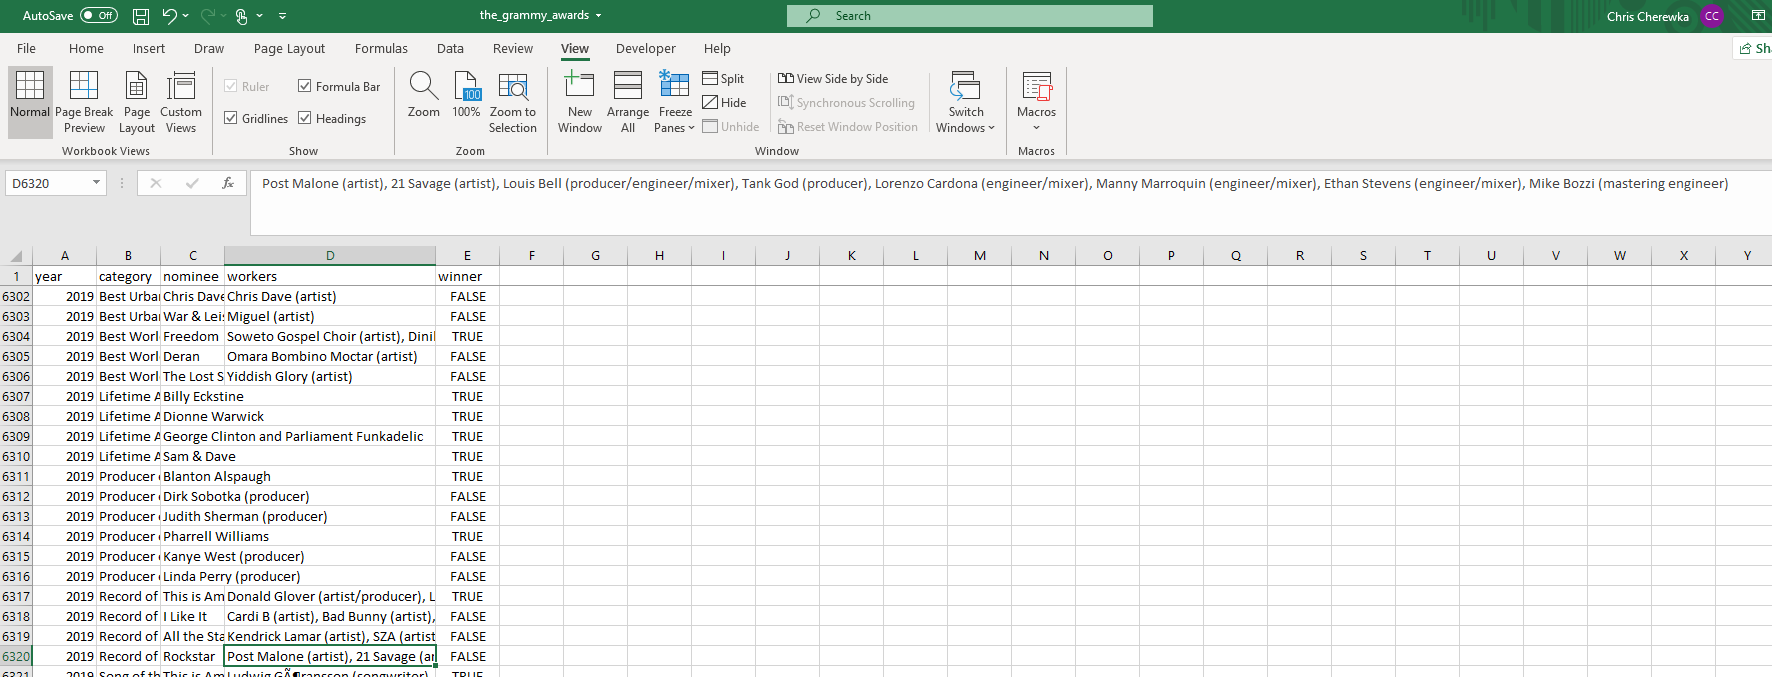

Given this example, we decided MongoDB would be the best database to load the data into.  MongoDB is much more flexible in terms of data not matching.  It wouldve been extremely tidious, if not impossible, to clean these databases so they would cleanly fit into a Postgress database.

We would be able to search for "Post Malone" in the grammy collection to compile a list of all awards Post Malone has been associated with.

We would be able to search for "Post Malone" in the billboard collection to compile a list of all the hits Post Malone has been associated with.

Mongo proves to be much faster in getting us to this point. However, we quickly noticed that one of the reasons we decided on using MongoDB (easier acceptance of data) also proved to be troublesome to work with at times.  Any times we made changes to any data in the Transformation stage, we had to be careful to delete entire collections before adding any changes.  If we didnt, Mongo would duplicate data.  (Dropping and re-loading entire collections seemed much more efficient than pushing any changes we made)

In [17]:
# Create mongo connection
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Create mongo database
db = client.music_db

In [18]:
# add song attributes into MongoDB
db.song_attributes.drop()
collection = db.song_attributes
collection.insert_many(att_df.to_dict('records'))

In [19]:
# add grammy dataframe into MongoDB
db.grammy.drop()
collection = db.grammy
collection.insert_many(grammy_df.to_dict('records'))

In [20]:
# add billboard summary dataframe into MongoDB
db.billboard_app_summary.drop()
collection = db.billboard_app_summary
collection.insert_many(billboard_appearances_df.to_dict('records'))

In [21]:
# add billbaord original dataframe to mongo
db.billboard.drop()
collection = db.billboard
collection.insert_many(billboard_perSong_df.to_dict('records'))

In [22]:
# add spotify dataframe to mongo
db.spotify.drop()
collection = db.spotify
collection.insert_many(spotify_df.to_dict('records'))

### Mongo Final Database

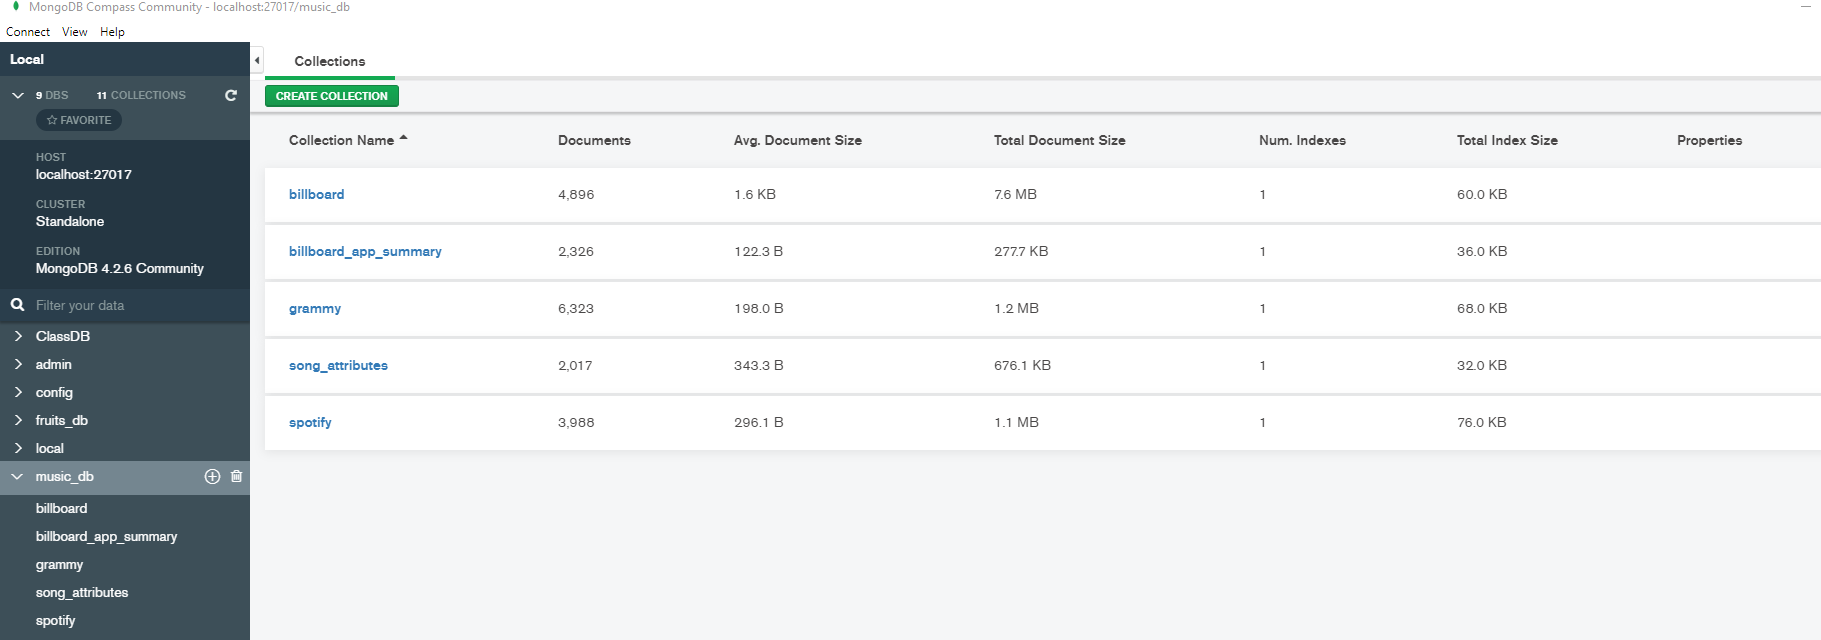

### Grammy Collection example

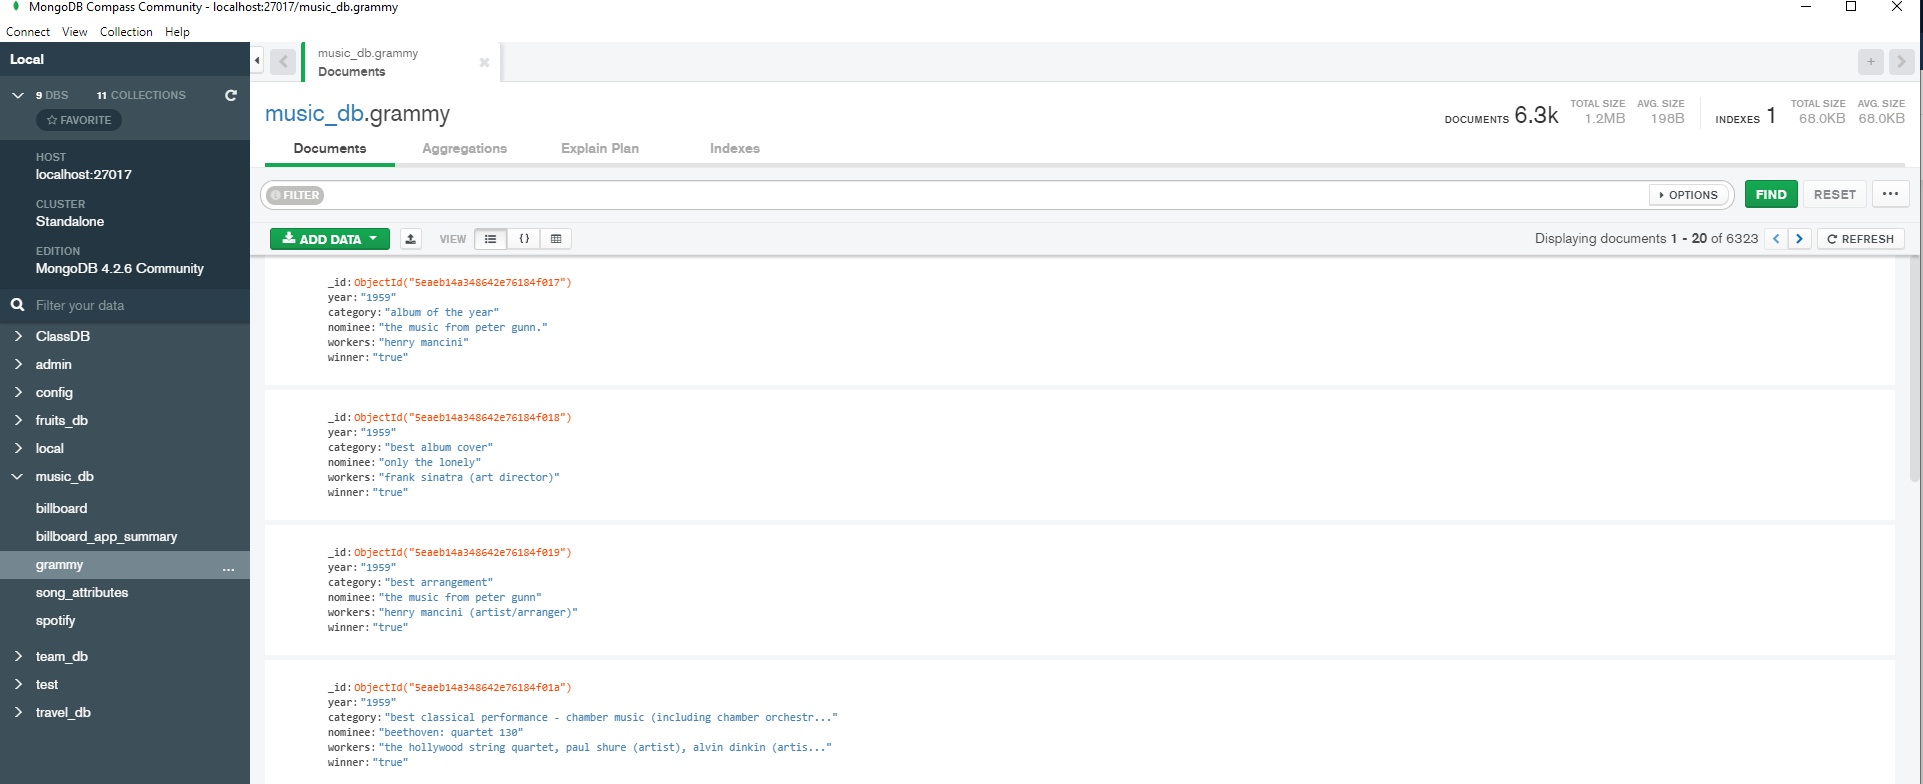

### Potential Analysis

1. We could pull artists from billboard and spotify collections and match with artists from nominee collection in the grammy database.  Very similar to stated earlier, this would now be a collection of Artists with "hits" and "awards"


2. From billboard collection, we could pull the top "hits" from each genre.  These same songs we could pull from the song_attributes collection and see if they have any similar ratings on tempo, loudness, energy, etc.